In [9]:
#Shopping Trends - Visualization Focused Project

In [10]:
#  Pandas is the Python library that provides the functions and tools required to handle and analyze data efficiently.

In [24]:
import pandas as pd

In [25]:
# Load the dataset
dataset = pd.read_csv('shopping_trends.csv')


In [26]:
# View the shape of the dataset
print("Dataset Shape:", dataset.shape)

Dataset Shape: (3900, 19)


In [27]:
# Get info about the dataset
print("\nDataset Info:")

print(dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object

In [28]:
# Check for missing values in each column
missing_data = dataset.isnull().sum()
print("\nMissing Data:")
print(missing_data)



Missing Data:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [29]:
# Get summary statistics for numerical columns
numerical_summary = dataset.describe()
print("\nSummary Statistics for Numerical Columns:")
print(numerical_summary)



Summary Statistics for Numerical Columns:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [30]:
# Get unique values for categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns
unique_values = {col: dataset[col].nunique() for col in categorical_columns}
print("\nUnique Values in Categorical Columns:")
for col, count in unique_values.items():
    print(f"{col}: {count} unique values")



Unique Values in Categorical Columns:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Payment Method: 6 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Preferred Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


In [31]:
# Display the first 5 rows
print("\nFirst 5 Rows of the Dataset:")
print(dataset.head())



First 5 Rows of the Dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping

In [32]:
# import Matplotlib: For basic plotting.
import matplotlib.pyplot as plt

In [33]:
# import Seaborn: For advanced, aesthetically pleasing charts.
!pip install seaborn

In [34]:
import seaborn as sns

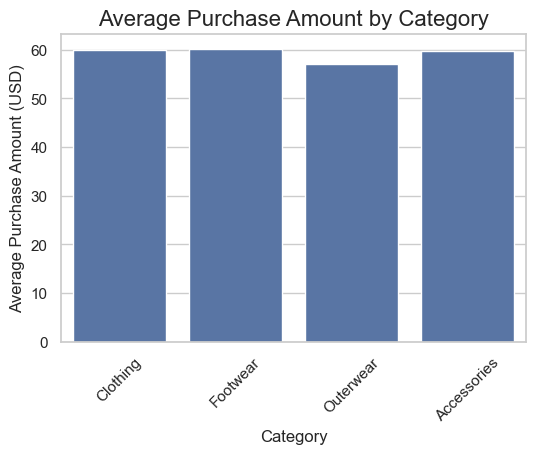

In [107]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

sns.set_context("notebook")  # Options: paper, notebook, talk, poster
sns.set_palette("deep")  # Choose a color palette


# Bar chart for average purchase amount by category
plt.figure(figsize=(6, 4))
sns.barplot(x="Category", y="Purchase Amount (USD)", data=dataset, errorbar=None)
plt.title("Average Purchase Amount by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Purchase Amount (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

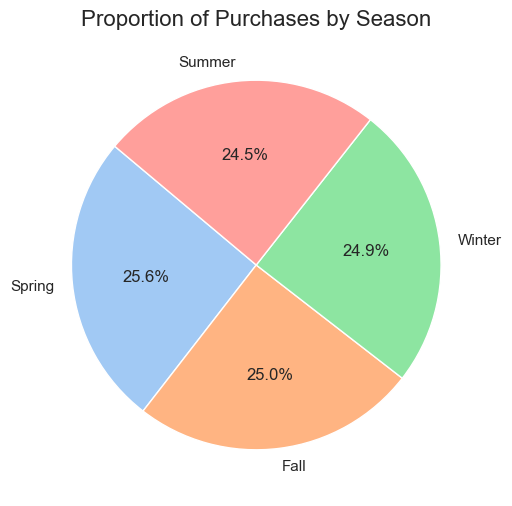

In [108]:
# Pie chart for purchases by season
season_counts = dataset["Season"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Purchases by Season", fontsize=16)
plt.show()


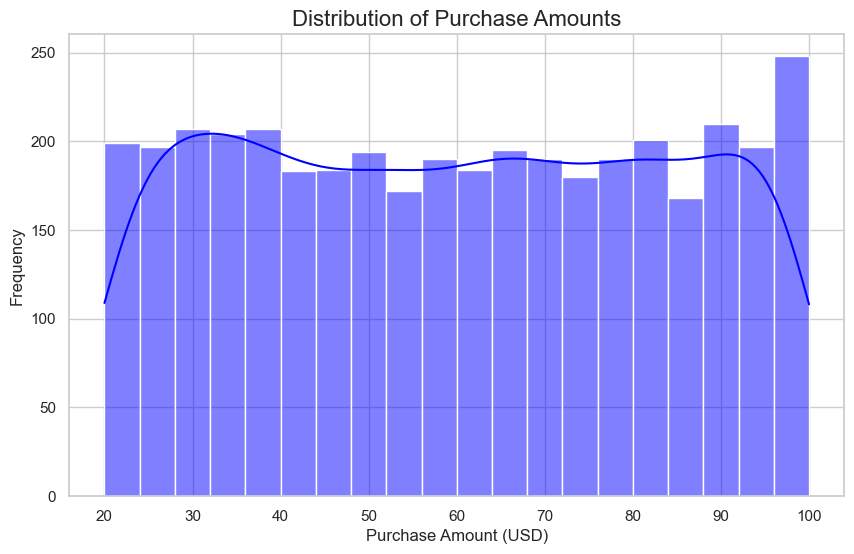

In [109]:
# Histogram for purchase amounts
plt.figure(figsize=(10, 6))
sns.histplot(dataset["Purchase Amount (USD)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Purchase Amounts", fontsize=16)
plt.xlabel("Purchase Amount (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


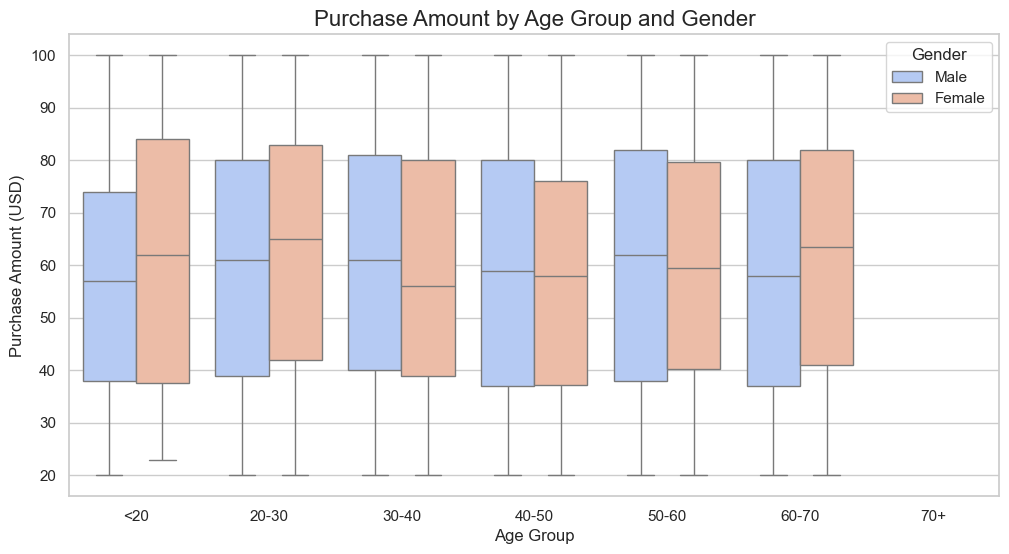

In [110]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

# Box plot for age group vs. purchase amount, segmented by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age Group", y="Purchase Amount (USD)", hue="Gender", data=dataset, palette="coolwarm")
plt.title("Purchase Amount by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.legend(title="Gender")
plt.show()

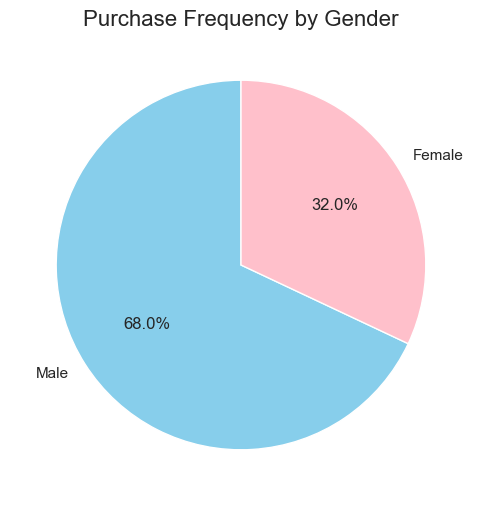

In [111]:
# Count the number of purchases by gender
gender_counts = dataset['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Purchase Frequency by Gender", fontsize=16)
plt.show()


In [112]:
# The end of the project
# Thank you!